<a href="https://colab.research.google.com/github/kelvinfoo123/Time-Series-Analysis/blob/main/Earth_Surface_Temperature_Time_Series_Analysis_(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
temperature = pd.read_csv("temperature.csv")
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# Most average temperature entries are null before 1752-10-01

temperature = temperature[temperature['dt'] > '1752-09-01']
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
107,1752-10-01,8.908,1.709,Århus,Denmark,57.05N,10.33E
108,1752-11-01,5.637,0.921,Århus,Denmark,57.05N,10.33E
109,1752-12-01,2.242,1.175,Århus,Denmark,57.05N,10.33E
110,1753-01-01,-1.259,8.151,Århus,Denmark,57.05N,10.33E
111,1753-02-01,-0.285,3.715,Århus,Denmark,57.05N,10.33E


In [6]:
temperature.shape

(85443, 7)

In [7]:
temperature.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,82093.000000,82092.000000
mean,16.360861,1.064266
std,11.741421,1.166500
min,-31.138000,0.049000
25%,9.263000,0.355000
50%,18.444000,0.637000
75%,26.039000,1.379000
max,38.531000,15.030000


**Check for missing data**

In [8]:
# Check for presence of null values 
temperature.isnull().sum()

dt                                  0
AverageTemperature               3350
AverageTemperatureUncertainty    3351
City                                1
Country                             1
Latitude                            1
Longitude                           1
dtype: int64

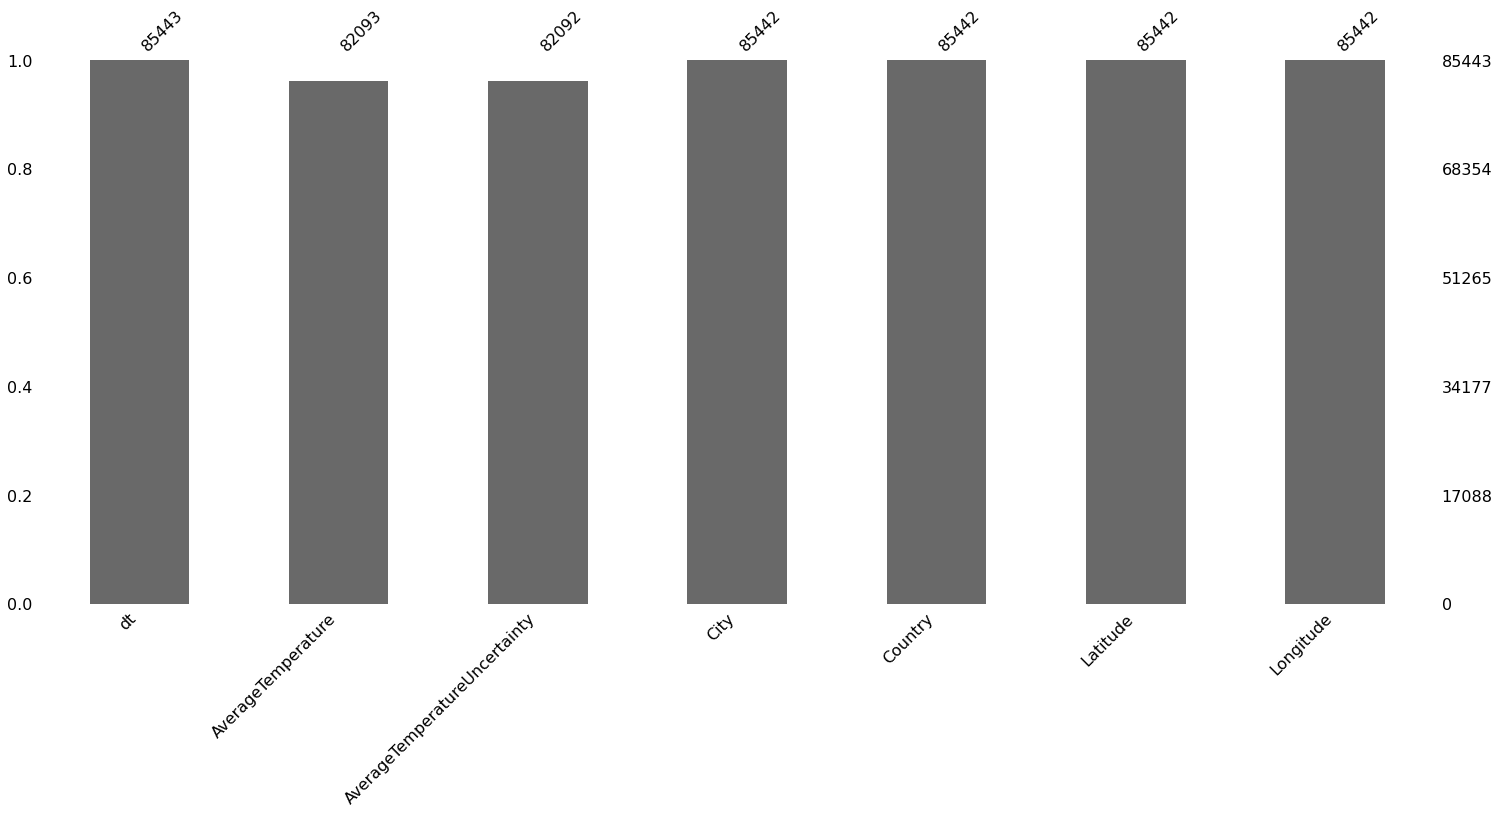

In [9]:
import missingno as msno 

# Number at the top represents number of non-null entries in that column. 
msno.bar(temperature)

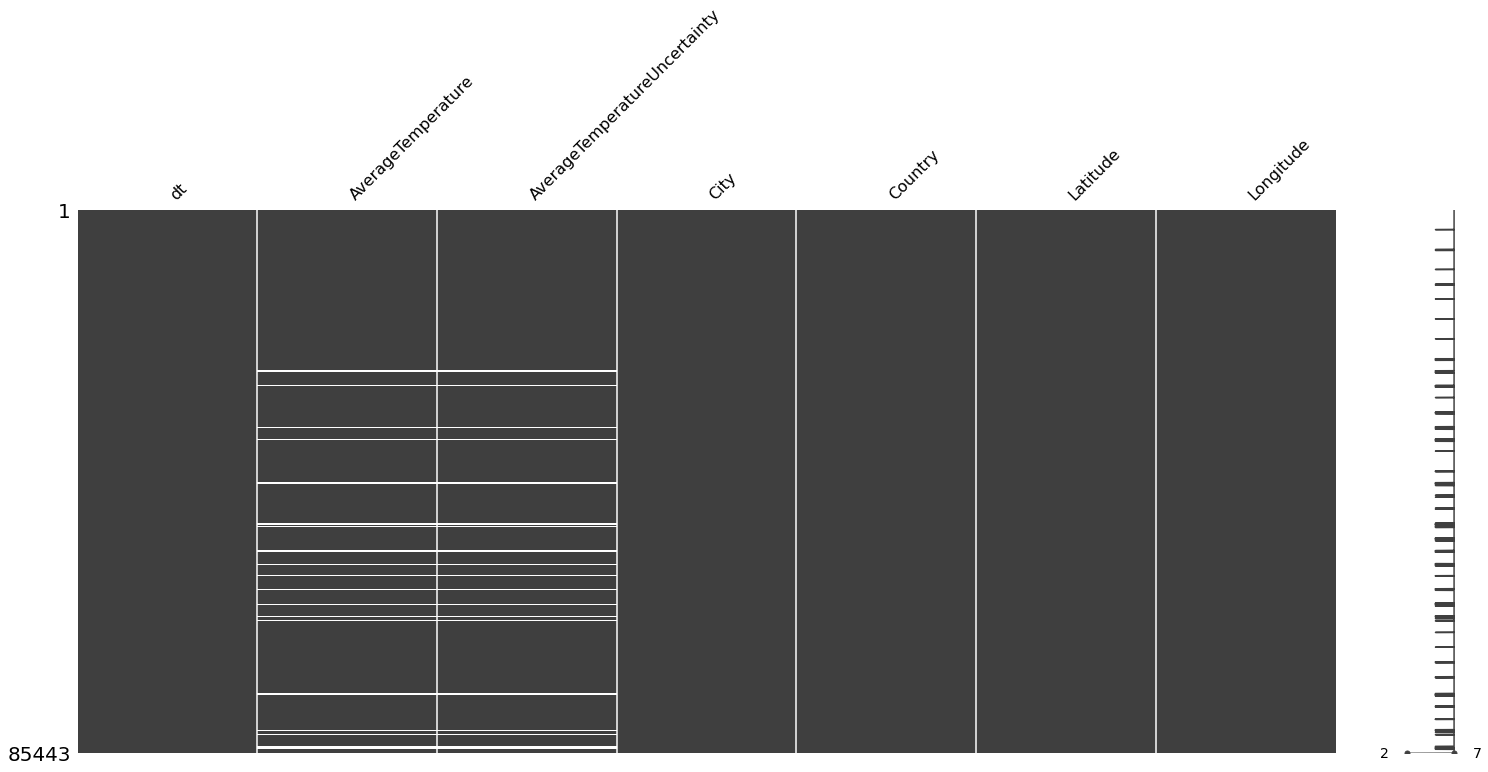

In [10]:
# Rows where data is absent is displayed in white. 

msno.matrix(temperature)

## **Exploratory data analysis**

**Is there global warming?**

In [11]:
# Extract the year from date 

def split_year(date): 
  return date.split('-')[0]

temperature['year'] = temperature['dt'].apply(split_year)

In [12]:
# Group the data by year 

temp_by_year = temperature.groupby('year').agg({'AverageTemperature': 'mean', 'AverageTemperatureUncertainty': 'mean'}).reset_index()

temp_by_year

,year,AverageTemperature,AverageTemperatureUncertainty
0,1752,8.045333,1.593056
1,1753,9.717940,3.746607
2,1754,9.694488,3.272881
3,1755,9.436881,4.304095
4,1756,10.055274,4.310821
...,...,...,...
257,2009,18.509044,0.363282
258,2010,18.339586,0.398597
259,2011,18.421896,0.404579
260,2012,18.310616,0.575333


In [13]:
# Define min and max temperature 

temp_by_year['max_temp'] = temp_by_year['AverageTemperature'] + temp_by_year['AverageTemperatureUncertainty']
temp_by_year['min_temp'] = temp_by_year['AverageTemperature'] - temp_by_year['AverageTemperatureUncertainty']

temp_by_year.head()

,year,AverageTemperature,AverageTemperatureUncertainty,max_temp,min_temp
0,1752,8.045333,1.593056,9.638389,6.452278
1,1753,9.717940,3.746607,13.464548,5.971333
2,1754,9.694488,3.272881,12.967369,6.421607
3,1755,9.436881,4.304095,13.740976,5.132786
4,1756,10.055274,4.310821,14.366095,5.744452


In [14]:
fig = px.line(temp_by_year, x = 'year', y = ['AverageTemperature', 'max_temp', 'min_temp'], title = 'Average temperature in the world')
fig.show()

Since average temperature increases over the year, global warming has increased. 

**Average temperature in each season**

In [15]:
# Extract the month 
temperature['dt'] = pd.to_datetime(temperature['dt'])
temperature['month'] = temperature['dt'].dt.month

temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
107,1752-10-01,8.908,1.709,Århus,Denmark,57.05N,10.33E,1752,10
108,1752-11-01,5.637,0.921,Århus,Denmark,57.05N,10.33E,1752,11
109,1752-12-01,2.242,1.175,Århus,Denmark,57.05N,10.33E,1752,12
110,1753-01-01,-1.259,8.151,Århus,Denmark,57.05N,10.33E,1753,1
111,1753-02-01,-0.285,3.715,Århus,Denmark,57.05N,10.33E,1753,2


In [17]:
# Finding the season 
def season(month): 
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

temperature['season'] = temperature['month'].apply(season)
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,season
107,1752-10-01,8.908,1.709,Århus,Denmark,57.05N,10.33E,1752,10,autumn
108,1752-11-01,5.637,0.921,Århus,Denmark,57.05N,10.33E,1752,11,autumn
109,1752-12-01,2.242,1.175,Århus,Denmark,57.05N,10.33E,1752,12,winter
110,1753-01-01,-1.259,8.151,Århus,Denmark,57.05N,10.33E,1753,1,winter
111,1753-02-01,-0.285,3.715,Århus,Denmark,57.05N,10.33E,1753,2,winter


In [19]:
# Get temperatures for each season 
years = temperature['year'].unique()

spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []

for year in years: 
  current_dt = temperature[temperature['year'] == year]
  spring_temp.append(current_dt[current_dt['season'] == 'spring']['AverageTemperature'].mean())
  summer_temp.append(current_dt[current_dt['season'] == 'summer']['AverageTemperature'].mean())
  autumn_temp.append(current_dt[current_dt['season'] == 'autumn']['AverageTemperature'].mean())
  winter_temp.append(current_dt[current_dt['season'] == 'winter']['AverageTemperature'].mean())

season = pd.DataFrame()
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1752,NaN,NaN,9.400417,5.335167
1,1753,9.304857,17.430048,10.726714,1.410143
2,1754,8.547000,17.006810,11.055143,2.169000
3,1755,9.007333,17.673333,10.309952,0.756905
4,1756,8.626762,17.669143,10.097095,3.828095


In [20]:
fig=px.line(season,y=['spring_temp','summer_temp','autumn_temp','winter_temp'],title='Avg.temperature in each season')
fig.show()

## **Data Preprocessing**

**We are interested only in the country Denmark.**

In [31]:
temp_denmark = temperature[temperature['Country'] == 'Denmark']
temp_denmark.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,season
107,1752-10-01,8.908,1.709,Århus,Denmark,57.05N,10.33E,1752,10,autumn
108,1752-11-01,5.637,0.921,Århus,Denmark,57.05N,10.33E,1752,11,autumn
109,1752-12-01,2.242,1.175,Århus,Denmark,57.05N,10.33E,1752,12,winter
110,1753-01-01,-1.259,8.151,Århus,Denmark,57.05N,10.33E,1753,1,winter
111,1753-02-01,-0.285,3.715,Århus,Denmark,57.05N,10.33E,1753,2,winter


In [32]:
temp_new = temp_denmark[['dt', 'AverageTemperature']]
temp_new.head()

,dt,AverageTemperature
107,1752-10-01,8.908
108,1752-11-01,5.637
109,1752-12-01,2.242
110,1753-01-01,-1.259
111,1753-02-01,-0.285


In [34]:
# Drop null values
temp_new.dropna(inplace = True)
temp_new.shape

temp_new.set_index('dt', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
temp_new

,AverageTemperature
dt,
1752-10-01,8.908
1752-11-01,5.637
1752-12-01,2.242
1753-01-01,-1.259
1753-02-01,-0.285
...,...
2013-04-01,5.514
2013-05-01,12.770
2013-06-01,15.223


**Check for stationarity**

In [39]:
import statsmodels

In [40]:
# Use Dickey-Fuller test to check for stationarity 

from statsmodels.tsa.stattools import adfuller 

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(temp_new['AverageTemperature'])

ADF Test Statistic : -9.761596980167319
p-value : 7.537622858503069e-17
#Lags Used : 34
Number of Observations Used : 6227
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
df = temp_new.copy()

# A shift of 12 months imply a shift of one year 
df['First_temp_diff'] = df['AverageTemperature'] - df['AverageTemperature'].shift(12)
df.head()

,AverageTemperature,First_temp_diff
dt,,
1752-10-01,8.908,NaN
1752-11-01,5.637,NaN
1752-12-01,2.242,NaN
1753-01-01,-1.259,NaN
1753-02-01,-0.285,NaN


In [42]:
# Dicky fuller test on first temp difference to check stationarity 
adfuller_test(df['First_temp_diff'].dropna())

ADF Test Statistic : -18.78166228379943
p-value : 2.0241903359417766e-30
#Lags Used : 34
Number of Observations Used : 6215
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


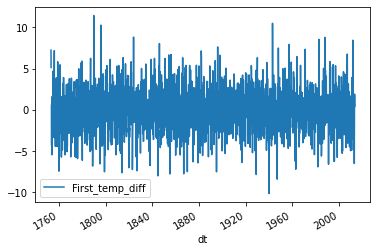

In [43]:
df[['First_temp_diff']].plot()

**Check for seasonality**

In [44]:
temp_new['month'] = temp_new.index.month
temp_new['year'] = temp_new.index.year 
temp_new.head()

<ipython-input-44-1ec5f24eac6a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-1ec5f24eac6a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AverageTemperature,month,year
dt,,,
1752-10-01,8.908,10,1752
1752-11-01,5.637,11,1752
1752-12-01,2.242,12,1752
1753-01-01,-1.259,1,1753
1753-02-01,-0.285,2,1753


In [46]:
pivot = temp_new.pivot_table(values = 'AverageTemperature', index = 'month', columns = 'year')
pivot

year,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,-1.259,-0.566,-3.436,2.011,-2.442,-3.154,2.671,-4.787,0.670,...,-0.660,3.668,-0.931,4.625,3.953,1.173,-3.799,0.098,1.978,-0.344
2,NaN,-0.285,-0.943,-4.277,2.887,0.857,-1.142,3.162,-0.386,1.186,...,2.155,0.615,0.413,1.767,4.925,0.429,-2.691,-0.307,-0.021,-0.390
3,NaN,4.210,-0.645,0.356,2.684,1.727,1.188,3.402,0.869,4.852,...,3.686,1.515,-0.591,6.170,3.654,3.906,2.429,3.042,6.050,-0.474
4,NaN,6.765,5.658,7.591,4.208,7.756,4.075,6.065,5.651,6.530,...,8.068,7.599,6.229,9.174,7.758,9.481,7.123,9.920,6.366,5.514
5,NaN,10.650,12.266,10.978,9.351,10.081,12.793,9.503,11.112,12.109,...,12.435,11.417,12.205,11.985,13.243,12.308,10.657,11.952,12.814,12.770
6,NaN,14.444,14.835,16.671,16.632,16.435,15.525,16.363,16.334,17.162,...,14.496,14.801,16.004,17.072,15.943,15.331,14.989,16.055,13.329,15.223
7,NaN,16.293,15.040,17.572,18.103,20.179,15.706,18.645,17.210,16.501,...,15.992,18.198,20.387,16.328,18.548,18.023,19.057,17.762,16.746,18.259
8,NaN,15.808,15.537,14.833,15.019,16.896,16.438,17.196,16.194,17.794,...,18.567,16.267,17.841,17.285,17.044,17.544,16.898,16.747,17.006,17.423
9,NaN,13.226,12.023,11.725,13.473,12.893,11.267,12.299,14.510,14.390,...,14.116,14.466,16.521,13.133,13.316,14.410,12.966,14.266,13.204,NaN


Text(0, 0.5, 'Temperature')

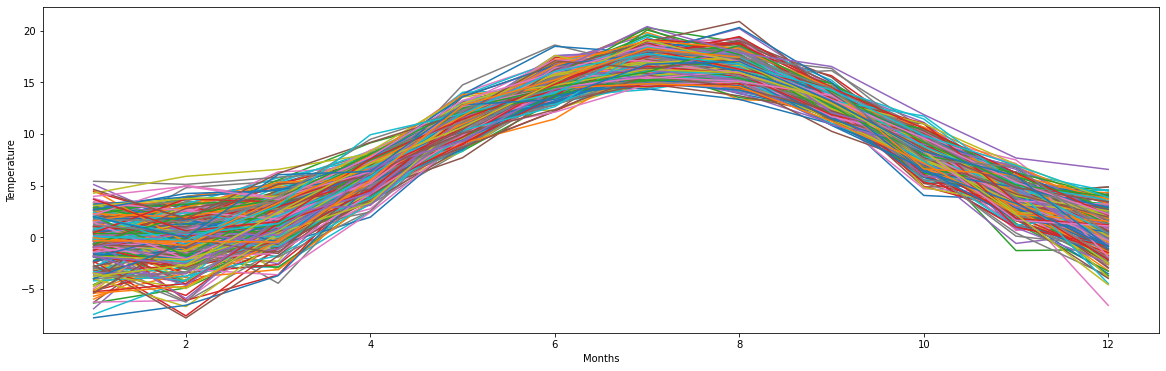

In [47]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')

There are seasonality in the data. 

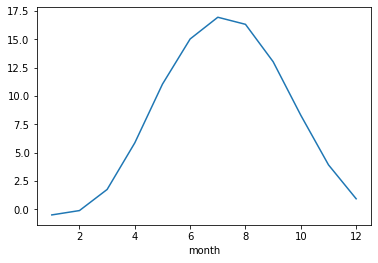

In [48]:
monthly_seasonality = pivot.mean(axis = 1)
monthly_seasonality.plot()

## **Build time series model**

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

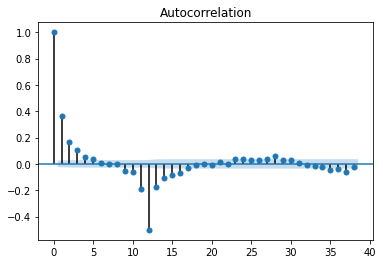

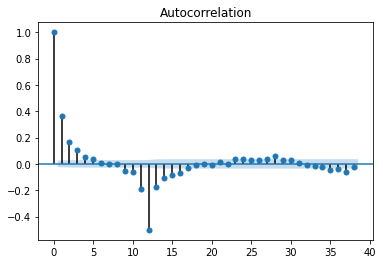

In [51]:
plot_acf(df['First_temp_diff'].dropna())

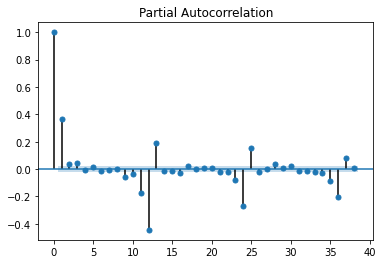

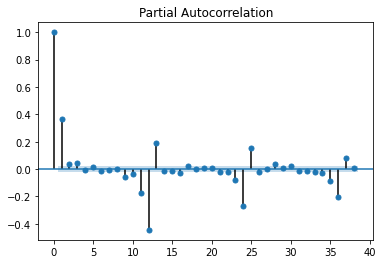

In [52]:
plot_pacf(df['First_temp_diff'].dropna())

ACF cuts off after 3 lags and PACF cuts off after 1 lag. 
We can try ARIMA(1,1,3). 

In [54]:
df.shape

(6250, 1)

In [55]:
# Split data 
training = df[0:6000]
test = df[6000:]

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
arima = ARIMA(training, order = (1,1,3))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [58]:
model = arima.fit()
predictions = model.forecast(steps = len(test))[0]
predictions

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




array([-0.88285739, -0.37864269, -0.2148938 , -0.11933328, -0.06356543,
       -0.03101937, -0.01202485, -0.0009386 ,  0.00553262,  0.00931066,
        0.01151703,  0.01280623,  0.01356019,  0.01400181,  0.01426114,
        0.01441411,  0.014505  ,  0.01455967,  0.01459319,  0.01461438,
        0.01462838,  0.01463817,  0.0146455 ,  0.01465141,  0.01465648,
        0.01466107,  0.01466537,  0.0146695 ,  0.01467354,  0.01467752,
        0.01468147,  0.0146854 ,  0.01468932,  0.01469323,  0.01469714,
        0.01470104,  0.01470494,  0.01470885,  0.01471275,  0.01471665,
        0.01472055,  0.01472446,  0.01472836,  0.01473226,  0.01473616,
        0.01474007,  0.01474397,  0.01474787,  0.01475177,  0.01475567,
        0.01475958,  0.01476348,  0.01476738,  0.01477128,  0.01477518,
        0.01477909,  0.01478299,  0.01478689,  0.01479079,  0.01479469,
        0.0147986 ,  0.0148025 ,  0.0148064 ,  0.0148103 ,  0.0148142 ,
        0.01481811,  0.01482201,  0.01482591,  0.01482981,  0.01

In [60]:
# Evaluation 
from sklearn.metrics import mean_squared_error 

np.sqrt(mean_squared_error(test, predictions))

2.408276401186272

Quite a good prediction model 